#TASK - 02

Utilize pre-trained generative models like DALL-E-mini or Stable Diffusion to create images from text prompts.

#Step 1 : Installing all required libraries:

diffusers, transformers, scipy, accelerate

. diffusers

Main purpose: Generate images from text prompts.

Why: It's the core library from Hugging Face for running models like Stable Diffusion.

It handles pipelines, image generation steps, schedulers, and model loading.

. transformers

Main purpose: Tokenize text and handle transformer-based models.

Why: Models like Stable Diffusion often use a CLIP tokenizer or text encoder from transformers to understand the prompt.

.  scipy

Main purpose: Scientific computing and math utilities.

Why: Some schedulers and post-processing steps in diffusion models (like image denoising) depend on SciPy functions.

. accelerate

Main purpose: Simplifies running models on GPU, CPU, or multiple devices.

Why: Helps the diffusers library run efficiently, especially when you're using a CUDA-enabled GPU.

In [9]:
!pip install diffusers transformers scipy accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

#Step - 2 : Loaded a pre-trained model (runwayml/stable-diffusion-v1-5) and sent it to GPU

1. Imports required libraries <br>
from diffusers import StableDiffusionPipeline
import torch

2. Loads the Stable Diffusion v1.5 model in half-precision (float16) for faster performance: <br>
pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
)

3. Moves the model to GPU for accelerated inference: <br>
pipe = pipe.to("cuda")

4. Defines a text prompt and generates an image from it: <br>
prompt = "A steampunk flying ship floating over the ocean at sunset"
image = pipe(prompt).images[0]

5. Saves the generated image locally: <br>
image.save("generated_image_diffusers.png")
print("Image generated and saved as generated_image_diffusers.png")

In [16]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

prompt = "A steampunk flying ship floating over the ocean at sunset"

image = pipe(prompt).images[0]

image.save("generated_image_diffusers.png")

print("Image generated and saved as generated_image_diffusers.png")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image generated and saved as generated_image_diffusers.png


. Below line will display the generated image right in your notebook or Colab output

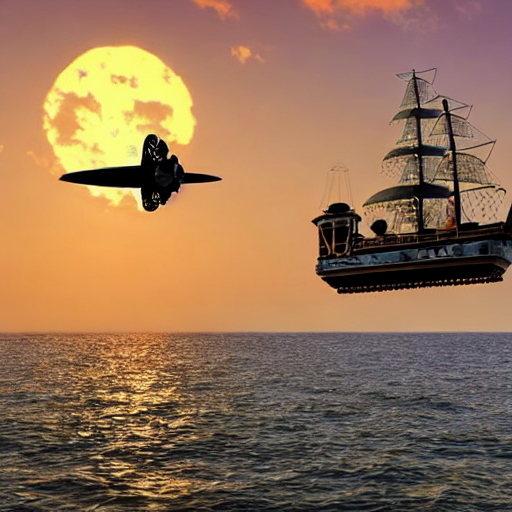

In [17]:
from IPython.display import Image, display
display(Image(filename="generated_image_diffusers.png"))

#Step - 3 : Generated multiple images from a list of text prompts

In [18]:
from diffusers import StableDiffusionPipeline
import torch

pipe = StableDiffusionPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    torch_dtype=torch.float16
).to("cuda")

prompts = [
    "A steampunk flying ship floating over the ocean at sunset",
    "A futuristic city skyline at night with flying cars",
    "A cozy cabin in a snowy forest under northern lights"
]

for i, prompt in enumerate(prompts, start=1):
    image = pipe(prompt).images[0]
    filename = f"generated_image_{i}.png"
    image.save(filename)
    print(f"Image saved as {filename}")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Image saved as generated_image_3.png


#Step - 4 : Saved all generated images with appropriate filenames

prompts = [
    "A steampunk flying ship floating over the ocean at sunset",
    "A futuristic city skyline at night with flying cars",
    "A cozy cabin in a snowy forest under northern lights"
]

for i, prompt in enumerate(prompts, start=1):
    image = pipe(prompt).images[0]
    filename = f"generated_image_{i}.png"
    image.save(filename)
    print(f"Image saved as {filename}")

. Loops over multiple prompts.

. Saves each image with a unique, clear filename.

. Uses enumerate(..., start=1) to number images starting from 1.

. Prints confirmation for each saved image.

#Step - 5 : Displayed the images inline in the notebook using IPython.display

Displaying generated_image_1.png


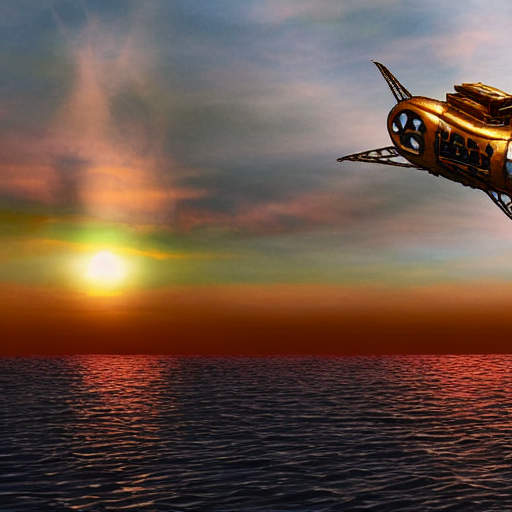

Displaying generated_image_2.png


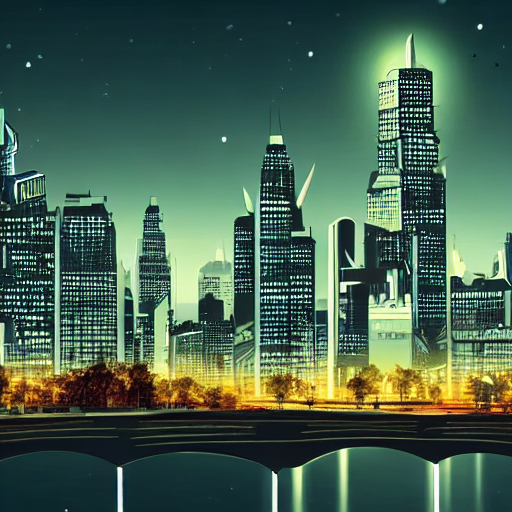

Displaying generated_image_3.png


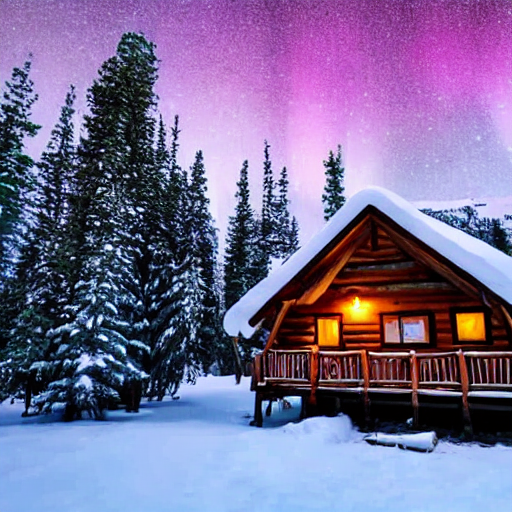

In [20]:
from IPython.display import Image, display

for i in range(1, 4):
    print(f"Displaying generated_image_{i}.png")
    display(Image(filename=f"generated_image_{i}.png"))
